![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Outlier detection: absolute limits
</b>
</span>

---
**Notebook version**: `1` (22 Apr 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Description**

- Flag values in time series that are outside specified absolute limits
- Flag contains `0` and `2`, whereby `0=OK` and `2=outlier`
- This example uses air temperature for one month and adds impulse noise to add some spikes to the data before testing.

</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

import matplotlib.pyplot as plt

import diive.configs.exampledata as ed
from diive.core.plotting.timeseries import TimeSeries
from diive.pkgs.createvar.noise import add_impulse_noise
from diive.pkgs.outlierdetection.absolutelimits import AbsoluteLimits

version_diive = importlib.metadata.version("diive")

warnings.filterwarnings('ignore')
print(f"diive version: v{version_diive}")

diive version: v0.85.0


</br>

# **Docstring**

In [2]:
help(AbsoluteLimits)

Help on function AbsoluteLimits in module diive.pkgs.outlierdetection.absolutelimits:

AbsoluteLimits(series: pandas.core.series.Series, minval: float, maxval: float, idstr: str = None, showplot: bool = False, verbose: bool = False)
    Generate flag that indicates if values in data are outside
    the specified range, defined by providing the allowed minimum and
    maximum for values in *series*.



</br>

# **Load example data**

## Load and prepare data (one month)

In [3]:
df = ed.load_exampledata_parquet()
s = df['Tair_f'].copy()
s = s.loc[s.index.year == 2018].copy()
s = s.loc[s.index.month == 7].copy()
s

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.040 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
2018-07-01 00:15:00    13.014
2018-07-01 00:45:00    12.409
2018-07-01 01:15:00    12.418
2018-07-01 01:45:00    12.071
2018-07-01 02:15:00    12.182
                        ...  
2018-07-31 21:45:00    16.928
2018-07-31 22:15:00    16.276
2018-07-31 22:45:00    16.256
2018-07-31 23:15:00    15.763
2018-07-31 23:45:00    15.919
Freq: 30min, Name: Tair_f, Length: 1488, dtype: float64

## Add impulse noise to time series, this creates spike outliers

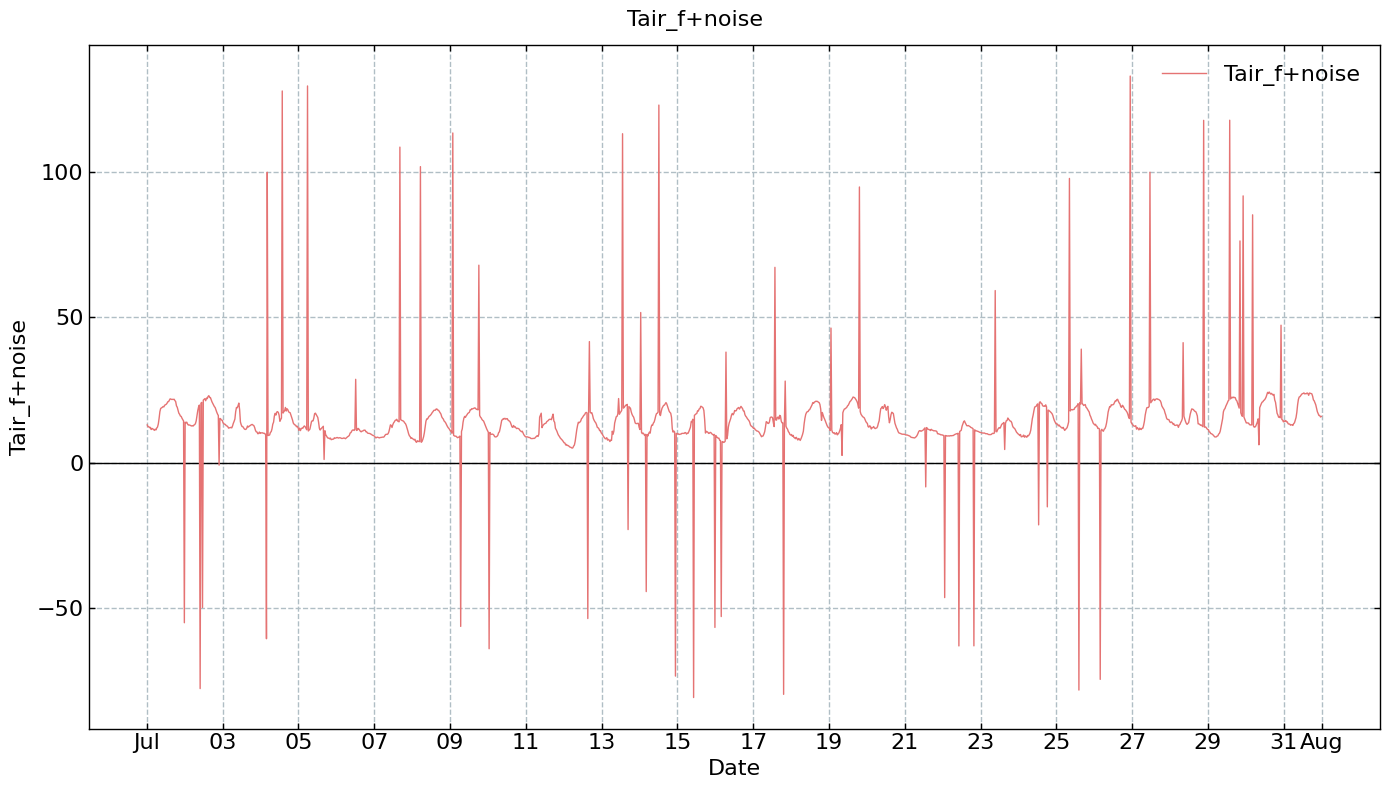

In [4]:
s_noise = add_impulse_noise(series=s,
                            factor_low=-20,
                            factor_high=5,
                            contamination=0.04)  # Add impulse noise (spikes)
s_noise.name = f"{s.name}+noise"
TimeSeries(s_noise).plot();

</br>

# **Absolute limits**

## Calculate flag (0=OK, 2=outlier)

[AbsoluteLimits]  running AbsoluteLimits ...


TIMESTAMP_MIDDLE
2018-07-01 00:15:00    0.0
2018-07-01 00:45:00    0.0
2018-07-01 01:15:00    0.0
2018-07-01 01:45:00    0.0
2018-07-01 02:15:00    0.0
                      ... 
2018-07-31 21:45:00    0.0
2018-07-31 22:15:00    0.0
2018-07-31 22:45:00    0.0
2018-07-31 23:15:00    0.0
2018-07-31 23:45:00    0.0
Freq: 30min, Name: FLAG_Tair_f+noise_OUTLIER_ABSLIM_TEST, Length: 1488, dtype: float64

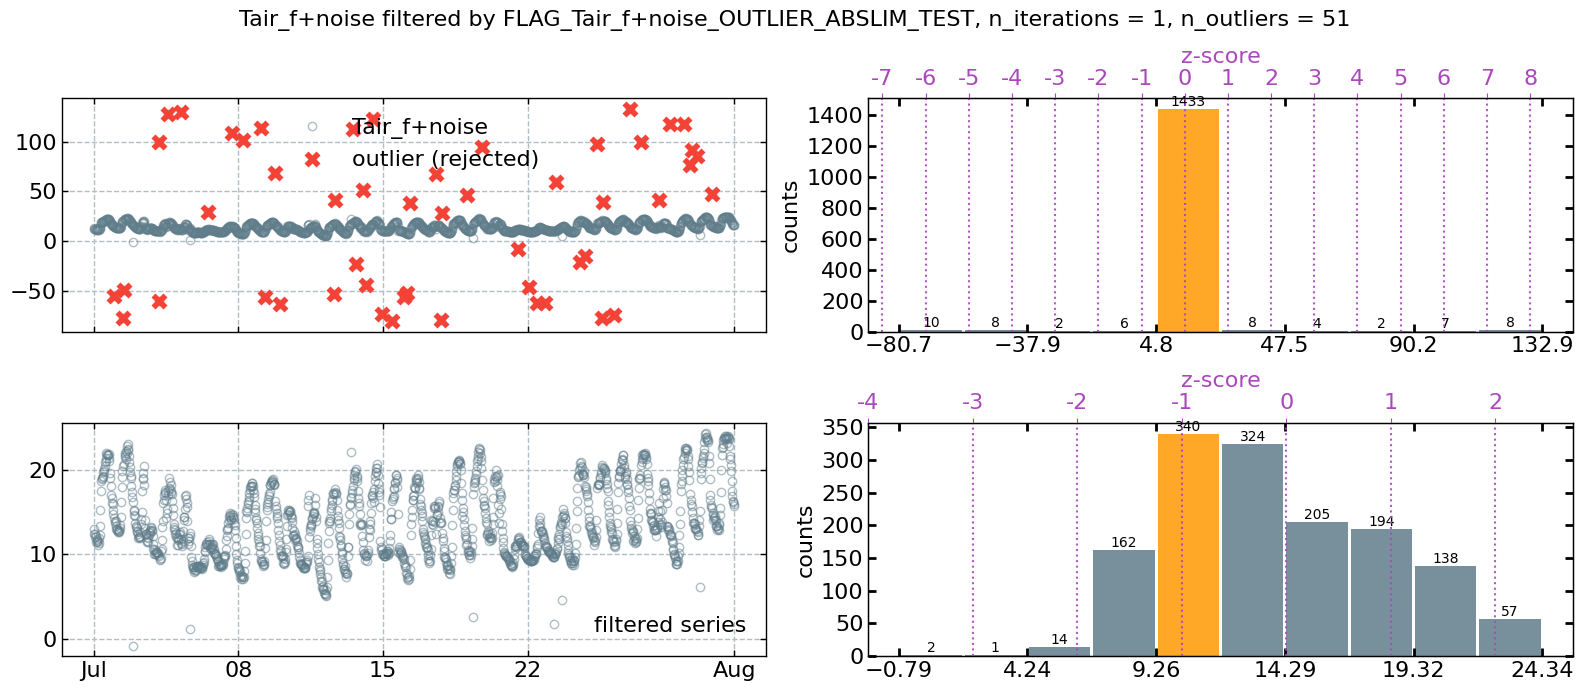

In [5]:
al = AbsoluteLimits(series=s_noise, minval=-1, maxval=25, showplot=True)
al.calc()
flag = al.get_flag()
flag

## Plot

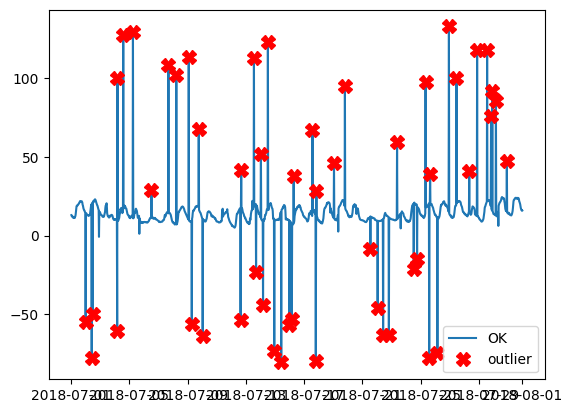

In [6]:
fig, ax = plt.subplots()
ax.plot(s_noise, label="OK")
ax.plot(s_noise[flag == 2], color="red", label="outlier", lw=0, ms=10, marker="X")
plt.legend()
# ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='About as simple as it gets, folks')
plt.show()

</br>

# End of notebook

In [7]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-01-24 18:32:18
